# Na aula anterior...

Por que o KNN é considerado um lazy algorithm/algoritmo preguiçoso?

Acurácia

Precisão

Sensibilidade

ROC AUC

# Hoje!

### Introdução Intuitiva - Árvore de Classificação

#### Case Futebol:  Jogos do Palmeiras em 2018

- É jogo de copa?
    - Sim: É das quartas em diante final?
        - Sim: Rychard foi ao estádio?
            - Sim: Palmeiras venceu
            - Não: Palmeiras perdeu
        - Não: Palmeiras venceu 
    - Não: Rychard está em casa?
        - Sim: Rychard fez pipoca?
            - Sim: Palmeiras venceu
            - Não: Palmeiras perdeu
        - Não: Palmeiras perdeu
            
~Resumo: a libertadores não veio em 2018 por culpa minha~

Da mesma forma que uma uma regressão logística, uma árvore de decisão representa uma função que toma como entrada uma série de atributos/*features* e retorna uma **decisão**: um valor de saída único.

Uma boa analogia é com os manuais de conserto de eletrodomésticos dos anos 90: se uma situação A acontecer, você seguirá os passos descritos pelo caminho A+; caso contrário, seguirá pelo caminho A-; cada caminho levará a diferentes verificações e, consequentemente, a diferentes conclusões.  chegando à sua conclusão por meio da execução de uma série de testes, em geral de "verdadeiro-falso". De forma simples e direta, é um conjunto de regras *if-then-else*, sendo de fácil interpretação e implementação.

Olhando para o exemplo da imagem a seguir, podemos ilustrar essa sequência: a raiz e cada nó interno na árvore correspondem ao testes de um atributo de entrada do modelo; as folhas representam a decisão para esse caminho que foi percorrido. 

![tree_nos](imagens/tree_nos.jpg)

Porém, os testes que ocorrem nos atributos não são aleatórios: devem ser entendidos como funções de custo que buscam otimizar a homogeneidade de suas subpopulações. Queremos fazer com que cada subpopulação de cada nó esteja cada vez mais homogêneo possível, até chegar a folha, usando para isso uma estratégia de dividir para conquistar. 

Vamos tomar como base uma amostra da tabela do Titanic:

In [10]:
import pandas as pd

df = pd.read_csv('dados/titanic.csv')

df_amostra = df.sample(15, random_state = 1)

df_amostra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [9]:
df_amostra.Survived.value_counts(normalize = True)

1    0.533333
0    0.466667
Name: Survived, dtype: float64

**Para pensar:** intuitivamente, entre Sex e Parch, qual é a coluna que mais discrimina sobrevivência? Por quê?

In [11]:
df_amostra[df_amostra.Sex == 'male'].Survived.value_counts(normalize = True)

0    0.857143
1    0.142857
Name: Survived, dtype: float64

In [12]:
df_amostra[df_amostra.Sex == 'female'].Survived.value_counts(normalize = True)

1    0.875
0    0.125
Name: Survived, dtype: float64

In [14]:
df_amostra.Parch.value_counts()

0    13
2     2
Name: Parch, dtype: int64

In [13]:
df_amostra[df_amostra.Parch == 0].Survived.value_counts(normalize = True)

1    0.538462
0    0.461538
Name: Survived, dtype: float64

In [15]:
df_amostra[df_amostra.Parch == 2].Survived.value_counts(normalize = True)

1    0.5
0    0.5
Name: Survived, dtype: float64

In [21]:
df_amostra.Survived.value_counts(normalize = True)

1    0.533333
0    0.466667
Name: Survived, dtype: float64

In [19]:
pd.crosstab(df_amostra.Survived, df_amostra.Sex, normalize = 'columns')

Sex,female,male
Survived,,
0,0.125,0.857143
1,0.875,0.142857


In [20]:
pd.crosstab(df_amostra.Survived, df_amostra.Parch, normalize = 'columns')

Parch,0,2
Survived,,
0,0.461538,0.5
1,0.538462,0.5


## Entropia

Em árvores de decisão, estamos buscando separar as instâncias de forma a obter o máximo de homogeneidade possível nas folhas, observano a variável resposta. Para chegar nesse ponto, olhamos para o conjunto de dados, escolhemos uma variável e um limiar e dividimos em dois subconjuntos baseados nisso. A partir daí podemos repetir o passo anterior para cada subconjunto, e para cada subconjunto gerado nos subconjuntos, fazendo um processo recursivo até que tenhamos nosso conjunto de dados perfeitamente separado.

Porém, precisamos escolher um critério para escolher uma variável e limiar para separar em dois subconjuntos. Para isso, usaremos um conceito da Teoria da Informação chamado Entropia, que mede a aleatoriedade de uma variável aleatória, sendo dada por:

$$H(\textrm{VA}) = -\sum_i{p_i \times \log_{2}{p_i}}$$


Exemplificando com uma moeda $M_1$ não viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.5$
- 2, coroa, com probabilidade $p_2 = 0.5$

Dessa forma, a entropia $H(M_1)$ é:

$$H(M_1) = -(0.5 \times \log_{2}{0.5} + 0.5 \times \log_{2}{0.5}) = 1$$

Logo, a entropia é máxima (casos binário), significando que essa variável possui um alto nível de aleatoriedade.

Exemplificando com uma moeda $M_2$ viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.1$
- 2, coroa, com probabilidade $p_2 = 0.9$


In [22]:
import numpy as np

In [23]:
-(0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.0

In [ ]:
p1 = 0.9
p2 = 0.1

In [24]:
-(0.9 * np.log2(0.9) + 0.1 * np.log2(0.1))

0.4689955935892812

In [ ]:
p1 = 0.99
p2 = 0.01

In [25]:
-(0.99 * np.log2(0.99) + 0.01 * np.log2(0.01))

0.08079313589591118

In [ ]:
p1 = 0.999
p2 = 0.001

In [26]:
-(0.999 * np.log2(0.999) + 0.001 * np.log2(0.001))

0.011407757737461138

In [28]:
p1 = 0.999
p2 = 1 - p1
-(p1 * np.log2(p1) + p2 * np.log2(p2))

0.011407757737461145

**Para pensar:** Qual a entropia da variável Pclass?

In [31]:
df.Pclass.value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [35]:
p1, p2, p3 = df.Pclass.value_counts(normalize = True).tolist()

-(p1 * np.log2(p1) + p2 * np.log2(p2) + p3 * np.log2(p3))

1.4393214704441286

**Para pensar:** Qual que é a entropia da variável Survived? Construam uma função que dado uma probabilidade calcule a entropia em casos binários.

In [36]:
def calcula_entropia(p):
    
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

In [39]:
df_amostra['Survived'].value_counts(normalize = True).iloc[0]

0.5333333333333333

In [40]:
calcula_entropia(df_amostra['Survived'].value_counts(normalize = True).iloc[0])

0.9967916319816366

In [109]:
p = np.arange(0.000, 0.999, 0.001)
e = calcula_entropia_p(p)

/var/folders/0m/f9g25vz16sq8vcnn186g387h0000gn/T/ipykernel_1051/1696176533.py:3: RuntimeWarning: divide by zero encountered in log2
  return -(p1 * np.log2(p1) + (p2) * np.log2(p2))
/var/folders/0m/f9g25vz16sq8vcnn186g387h0000gn/T/ipykernel_1051/1696176533.py:3: RuntimeWarning: invalid value encountered in multiply
  return -(p1 * np.log2(p1) + (p2) * np.log2(p2))


In [44]:
import matplotlib.pyplot as plt

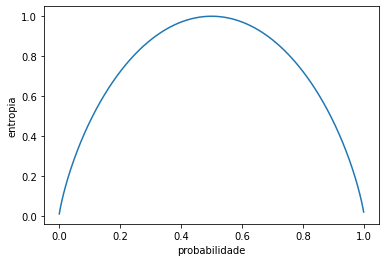

In [47]:
plt.plot(p, e)
plt.xlabel('probabilidade')
plt.ylabel('entropia')
plt.show()

Formalizando matematicamente:
    
Em casos binários, no qual uma variável aleatória assume o valor 0 ou 1, podemos escrever a entropia como

$$H(\textrm{VA}) = B\left( \frac{p}{p + n}\right)= -\big[p \times \log_{2}{p} + (1 - p) \times \log_{2}(1 - p)\big]$$

O que queremos obter com a divisão do conjunto de dados são subconjuntos que diminuam ao máximo a aleatoriedade da variável resposta do conjunto original. Logo, para cada atributo do conjunto de dados, queremos calcular o **Ganho de Informação** que mede a redução na entropia das partições obtidas de acordo os valores desse atributo. Isso é dado pela diferença entre a entropia do conjunto de exemplos original e a soma ponderada da entropia das partições, sendo a construção da árvore orientada pelo objetivo de reduzir a entropia.

Ou seja, um atributo $A$ com $d$ valores possíveis para ele gera $S$ subconjuntos $S_1, S_2, ..., S_d$. Cada subconjunto $S_k$ possui $p_k$ exemplos positivos e $n_k$ exemplos negativos, nos dando uma entropia de $B\left( \frac{p_k}{p_k + n_k}\right)$. Ponderando pela quantidade de exemplos dos subconjuntos, temos um conteúdo de informação esperado do atributo $A_i$ de

$$E(A_i) = \sum_i{\frac{p_k + n_k}{p + k} B\left( \frac{p_k}{p_k + n_k}\right)}$$.

Dessa forma, o Ganho de Informação do atributo $A_i$ é a redução na entropia do estado anterior para o estado posterior, na forma

$$\textrm{Ganho}(A_i) =  B\left( \frac{p}{p + n}\right) - E(A_i)$$






**Para pensar**: Qual a entropia de Survived no conjunto masculino e feminino de df_amostra?

In [48]:
calcula_entropia(df_amostra[df_amostra.Sex == 'male']['Survived'].value_counts(normalize = True).iloc[0])

0.5916727785823275

In [49]:
calcula_entropia(df_amostra[df_amostra.Sex == 'female']['Survived'].value_counts(normalize = True).iloc[0])

0.5435644431995964

**Para pensar:** Qual o ganho de informação em Survived de utilizar as variáveveis Sex e Parch no dataframe de amostra?

In [50]:
df_amostra['Survived']

862    1
223    0
84     1
680    0
535    1
623    0
148    0
3      1
34     0
241    1
794    0
2      1
6      0
17     1
368    1
Name: Survived, dtype: int64

In [57]:
p = df_amostra['Survived'].value_counts(normalize=True).iloc[0]
-( p * np.log2(p) + (1-p) * np.log2(1-p))

0.9967916319816366

In [59]:
p = df_amostra[df_amostra['Sex'] == 'female'].Survived.value_counts(normalize=True).iloc[0]

entropia_female = -( p * np.log2(p) + (1-p) * np.log2(1-p))
entropia_female

0.5435644431995964

In [60]:
p = df_amostra[df_amostra['Sex'] == 'male'].Survived.value_counts(normalize=True).iloc[0]

entropia_male = -( p * np.log2(p) + (1-p) * np.log2(1-p))
entropia_male

0.5916727785823275

In [67]:
p = df_amostra['Survived'].value_counts(normalize = True).iloc[0]
ei = calcula_entropia(p)

p_p1 = df_amostra[df_amostra.Parch == 0].Survived.value_counts(normalize = True).iloc[0]
p0 = calcula_entropia(p_p1)

p_p2 = df_amostra[df_amostra.Parch != 0].Survived.value_counts(normalize = True).iloc[0]
p2 = calcula_entropia(p_p2)

#entropia final de PEARCH
ef_parch = (p_p1 + p_p2) / 2

ganho_parch = ei - ef_parch

print("Entropia final de Parch: ", ef_parch)
print("Ganho da entropia de Parch: ", ganho_parch)

Entropia final de Parch:  0.5192307692307692
Ganho da entropia de Parch:  0.4775608627508674


Juntando tudo em funções:

In [111]:
def calcula_entropia_p(p1):
    
    if p1 == 0 or p1 == 1:
        return 0
    
    p2 = 1 - p1    
    
    return -(p1 * np.log2(p1) + (p2) * np.log2(p2))


def calcula_entropia(serie):
    return calcula_entropia_p(serie.value_counts(normalize = True).iloc[0])
    
    
def calcula_ganho_informacao(df, var_resp, var_quebra, vlr_quebra):
    ei = calcula_entropia(df[var_resp])
    
    conj1 = df[df[var_quebra] == vlr_quebra]
    conj2 = df[df[var_quebra] != vlr_quebra]
    
    e1 = calcula_entropia(conj1[var_resp])
    e2 = calcula_entropia(conj2[var_resp])
    
    ef = (e1 * len(conj1) + e2 * len(conj2)) / len(df)
    
    return ei - ef

In [94]:
calcula_ganho_informacao(df_amostra, 'Survived', 'Sex', 'female')

0.430776632270099

In [95]:
calcula_ganho_informacao(df_amostra, 'Survived', 'Parch', 0)

0.0004945068413678699

In [98]:
calcula_ganho_informacao(df_amostra, 'Survived', 'SibSp', 0)

0.013132465170738628

In [99]:
calcula_ganho_informacao(df_amostra, 'Survived', 'Embarked', 'S')

0.0011694768985351933

In [100]:
calcula_ganho_informacao(df_amostra, 'Survived', 'Embarked', 'Q')

0.013132465170738628

In [112]:
calcula_ganho_informacao(df_amostra, 'Survived', 'Embarked', 'C')

0.07724537168300183

In [96]:
df_amostra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
